# Final Project Report
###  AMONG THE GAME DIGITAL SERVICE DISTRIBUTORS
# ------------------------------------------------
#### Member: Hung Tran and Minh Nguyen (M6)
#### Supervisor: Dr. Ashwin Lall

### 1. Central Question:
    
Between PC gaming providers and console gaming providers, which of them will bring the better experiences to the players?

### 2. Abstract:

   In this research, our core research is on the potential differences in players'interaction between PC gaming apps and console gaming apps. The way we define players' experience is based on the the number of players participating in the game, price, rating, and genres of games. To answer the question whether PC or console gaming applications would bring the better experience to the players, we focus on tackling the number of app users on both foundations and find out the possible trends within them. This is important because the data we found is updated daily, even hourly, so it can truly reflect how real clients in these 2 foundations are interacting with the products (the games/apps). 
    

### 3. Hypothesis:


In our perspective, the games coming from console devices will provide better services and gaming experiences to the players. It is understandable since there will be a potential bias lying on the console game providers. Our hypothesis claims the reason in which the console devices will focus more on the graphic design as well as the game pixelization. Moreover, they might also focus on developing the mechanic system of controlling consoles to purify the inducing level in the player's interaction with the game. On the other hand, PC game developers tend to have some limitations in the way game players interact with the game's graphics. 

### 4. Data
####  Video game digital distribution service on PC data:                               
#### - steam.html                               
#### - epic-games.json                      
#### - GOG_games.json                    
#### Video game digital distribution service on Console data:
#### - ps4_player.html
#### - price-guide.csv
#### - Game_list_rating.csv



### 5. List of Questions
#### 1. What is the number of players playing game from Steam compared to PS4?
#### 2. Comparing the price using price-guide.csv (PS4) and epic-game.json (PC).
#### 3. What is the review/rating between the PC games compared to the Console games using GOG_games.json (PC) and Game_list_rating.csv (Console)?
#### 4. Is PC or Console game digital distribution service provides more popular games' genre?

### Import required libraries

In [1]:
from lxml import html, etree
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

## Question 1:   What is the number of players playing game from Steam compared to PS4?


### Create the steam.xml file based on the steam.html file 

In [2]:
if __name__ == '__main__':
  
    file = "steam.html"

    with open(file, 'r', encoding='utf-8') as inp:
        htmldoc = html.fromstring(inp.read())
  
    with open("steam.xml", 'wb') as out:
        out.write(etree.tostring(htmldoc))

### Converting the steam.xml file to steam.df (Tabular data)
    
    

In [3]:
def steam_xml_to_df(xml_file):
    '''
    Input: the xml_file
    Output: A table consisting of all columns which are previously founds as 
    the attributes from the xml file. Each value in the table is the attribute' text.
   
    This function is made specifically for the steam.xml file in order to read in the data 
    and convert it into tabular form.
    '''
    # Open the steam.xml
    stripparser = etree.XMLParser(remove_blank_text = True)
    tree = etree.parse(xml_file, stripparser)
    root = tree.getroot()
    string = etree.tostring(root, pretty_print = True).decode('utf-8')

    # Create list of attributes for Most Played Games 
    attribute=[]
    attr_head=root.find("thead")
    attr_tr=attr_head.find("tr")
    attr_th=attr_tr.find("th")
    attr_a=attr_th.find("a")
    attr_span=attr_a.find("span")
    attribute.append(attr_a.text+attr_span.text)
    attr_th=attr_th.getnext()
    attribute.append(attr_th.text)
    attr_th=attr_th.getnext()
    attribute.append(attr_th.text)

    # Create LoL of values for Most Played Games 
    steam_LoL=[]
    for tr in root.find("tbody"):
        LoL=[]
        for td in tr:
            for a in td:
                if a.text!=None:
                    LoL.append(a.text)
            if td.text!=None:
                LoL.append(td.text)
        steam_LoL.append(LoL)
    steam_LoL.pop(0)

    #Convert steam_LoL to dataframe for Most Played Games
    steam_df=pd.DataFrame(steam_LoL,columns=attribute)
    
   

    # Create list of attributes for Popular Releases 
    attribute2=[]
    attr1=root.find("div")
    attr2=attr1.getnext()
    attr2_div=attr2.find("div")
    attr2_table=attr2_div.find("table")
    attr2_head=attr2_table.find("thead")
    attr2_tr=attr2_head.find("tr")
    attr2_th=attr2_tr.find("th")
    attr2_a=attr2_th.find("a")
    attr2_span=attr2_a.find("span")
    attribute2.append(attr2_span.text)
    attr2_th=attr2_th.getnext()
    attribute2.append(attr2_th.text)
    attr2_th=attr2_th.getnext()
    attribute2.append(attr2_th.text)

    # Create LoL of values for Popular Releases 
    steam2_LoL=[]
    tbody2=attr2_table.find("tbody")
    for tr in tbody2:
        LoL=[]
        for td in tr:
            for a in td:
                if a.text!=None:
                    LoL.append(a.text)
            if td.text!=None:
                LoL.append(td.text)
        steam2_LoL.append(LoL)

    #Convert steam_LoL to dataframe for Popular Releases 
    steam2_df=pd.DataFrame(steam2_LoL,columns=attribute2)


    # Create list of attributes for Hot Releases
    attribute3=[]
    attr3=attr2_div.getnext()
    attr3_table=attr3.find("table")
    attr3_head=attr3_table.find("thead")
    attr3_tr=attr3_head.find("tr")
    attr3_th=attr3_tr.find("th")
    attr3_a=attr3_th.find("a")
    attribute3.append(attr3_a.text)
    attr3_th=attr3_th.getnext()
    attribute3.append(attr3_th.text)
    attr3_th=attr3_th.getnext()
    attribute3.append(attr3_th.text)

    # Create LoL of values for Hot Releases 
    steam3_LoL=[]
    tbody3=attr3_table.find("tbody")
    for tr in tbody3:
        LoL=[]
        for td in tr:
            for a in td:
                if a.text!=None:
                    LoL.append(a.text)
            if td.text!=None:
                LoL.append(td.text)
        steam3_LoL.append(LoL)

    #Convert steam_LoL to dataframe for Hot Releases
    steam3_df=pd.DataFrame(steam3_LoL,columns=attribute3)


    #Concaternate all the dataframes from steam.xml
    steam_df_concat=pd.concat([steam_df,steam2_df,steam3_df],axis=1)
    return steam_df_concat
    
steam_xml_to_df("steam.xml")

,Most Played Games,Players Now,Peak Today,Popular Releases,Peak Today,Price,Hot Releases,Rating,Price
0,Counter-Strike: Global Offensive,"329,441","775,470",Farming Simulator 22,"90,172",$49.99,Secret Summer (version 0.10),86.60%,$9.99
1,Dota 2,"280,256","601,006",Battlefield™ 2042,"54,046",$59.99,DEEEER Simulator: Your Average Everyday Deer Game,86.01%,$14.99
2,Halo Infinite,"141,472","180,230",天命奇御二 Fate Seeker II,"13,438",$22.60,Hero of the Kingdom: The Lost Tales 2,85.72%,$6.29
3,Team Fortress 2,"103,969","113,130",Mortal Online 2,502,$39.99,天命奇御二 Fate Seeker II,85.50%,$22.60
4,New World,"99,105","154,264",DEEEER Simulator: Your Average Everyday Deer Game,224,$14.99,FrankenStorm,82.20%,Free
5,Apex Legends,"89,925","208,788",FrankenStorm,188,Free,Farming Simulator 22,81.46%,$49.99
6,MIR4,"86,739","90,162",League Manager 2022,140,$21.24,Duck Simulator 2,80.00%,Free
7,PUBG: BATTLEGROUNDS,"83,306","305,952",King under the Mountain,98,$22.49,Mortal Online 2,79.97%,$39.99
8,Rust,"66,991","89,267",Natsuki's Life In Prison,83,$11.69,Natsuki's Life In Prison,78.32%,$11.69
9,Grand Theft Auto V,"49,611","98,369",Hero of the Kingdom: The Lost Tales 2,50,$6.29,Hidden Objects - Sleeping Beauty,78.30%,$2.69


### Create the ps4_player.xml file based on the ps4_player.html file 

In [4]:
if __name__ == '__main__':
  
    file = "ps4_player.html"
  
    with open(file, 'r', encoding='utf-8') as inp:
        htmldoc = html.fromstring(inp.read())
  
    with open("ps4_player.xml", 'wb') as out:
        out.write(etree.tostring(htmldoc))

### Converting the ps4_player.xml file to ps4_player.df (Tabular data)

In [5]:
def ps4_players_xml_to_df(xml_file):
    '''
    Input: the xml_file
    Output: A table consisting of all columns which are previously founds as 
    the attributes from the xml file. Each value in the table is the attribute' text.
   
    This function is made specifically for the ps4_player.xml file in order to read in the data 
    and convert it into tabular form.
    '''
    #Read xml file 
    stripparser = etree.XMLParser(remove_blank_text = True)
    tree = etree.parse(xml_file, stripparser)
    root = tree.getroot()
    string = etree.tostring(root, pretty_print = True).decode('utf-8')

    #Create list of attributes for ps4 data
    ps4_attribute=[]
    ps4_table=root.find("table")
    ps4_head=ps4_table.find("thead")
    ps4_tr=ps4_head.find("tr")

    for th in ps4_tr:
        ps4_attribute.append(th.text)
    del ps4_attribute[0:2]


    # Create LoL of values for ps4 data
    ps4_main_LoL=[]
    ps4_body=ps4_table.find("tbody")
    for tr in ps4_body:
        ps4_LoL = []
        for td in tr:
            if td.find("a") in td: 
                ps4_a=td.find("a")
                ps4_LoL.append(ps4_a.text)
            else:
                ps4_LoL.append(td.text)
        del ps4_LoL[0:2]
        ps4_main_LoL.append(ps4_LoL)

    #Convert steam_LoL to dataframe for ps4 data
    ps4_player=pd.DataFrame(ps4_main_LoL,columns=ps4_attribute)
    return ps4_player

ps4_players_xml_to_df("ps4_player.xml")

,Game,Platform,Hours Played,Players,Sessions,Avg Session
0,Rust Console Edition,PS4,1730,231,531,3:16
1,Apex Legends,PS4,1100,401,692,1:36
2,Fortnite,PS4,1031,454,781,1:20
3,Grand Theft Auto V,PS4,1023,423,631,1:38
4,FIFA 22,PS4,1017,304,627,1:38
...,...,...,...,...,...,...
95,Batman: Return to Arkham,PS4,26,10,19,1:23
96,Marvel's Avengers,PS4,26,12,23,1:08
97,NARUTO TO BORUTO: SHINOBI STRIKER,PS4,26,12,18,1:26
98,DARK SOULS™: REMASTERED,PS4,25,10,16,1:34


### Merge steam_df with ps4_player and get the number of players for PC (Steam) and Console (PS4)


In [6]:
def merged_steam_ps4player(steam_func, ps4_func):
    '''
    Input: The two given funtions: steam_func, ps4_func
    Output: The merged table containing the data about the players in both platforms
    merged: The variable used for merging 2 tabular dataset after being transformed from 
    hierarical data form.
    
    This function is made to read in the data and merge the selected data into 1 uniform table
    '''
    merged=pd.merge(steam_func,ps4_func,left_on="Most Played Games",right_on="Game",how="inner")
    merged=merged[["Most Played Games","Players Now","Game","Players"]]
    merged.rename(columns={"Most Played Games": "Games On PC", "Game": "Games On PS4"},inplace=True)
    return merged

merged_steam_ps4player(steam_xml_to_df("steam.xml"), ps4_players_xml_to_df("ps4_player.xml"))

,Games On PC,Players Now,Games On PS4,Players
0,Apex Legends,"89,925",Apex Legends,401
1,Grand Theft Auto V,"49,611",Grand Theft Auto V,423
2,Battlefield™ 2042,"42,339",Battlefield™ 2042,82
3,Terraria,"40,984",Terraria,16
4,Dead by Daylight,"40,369",Dead by Daylight,233
5,Destiny 2,"38,631",Destiny 2,73


### Use boxplot to visualize the number of players for each device

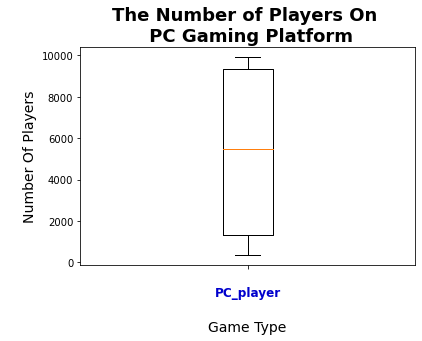

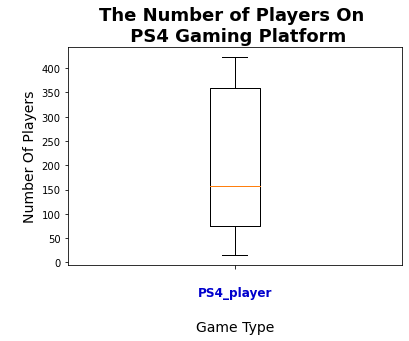

In [7]:
def boxplot_numplayer(get_merged):
    '''
    Input: The data from the merged table about 2 figures of the number of players between console and PC
    Output: The 2 boxplot about the number of players in 2 platforms.
    
    This function is designed to visualize the number of players. The reason why 
    we don't put 2 boxplots into the same chart is because the range between PC and console players 
    is significantly different. Separating them into 2 charts will be easier in evaluating process.
    '''
    PC_player = []
    for i in list(get_merged['Players Now']):
        i=i.replace(",","")
        PC_player.append(int(i[1:]))
        

    PS4_player =[]
    for i in list(get_merged['Players']):
        PS4_player.append(int(i))

    fig0, ax0 = plt.subplots()
    ax0.set_title("The Number of Players On \n PC Gaming Platform", fontweight='bold', fontsize=18)
    ax0.boxplot(PC_player)
    plt.xticks([1], ["\nPC_player"], fontweight='bold', fontsize= 12, color = "#0000CD")
    plt.xlabel("\nGame Type", fontweight='normal', fontsize=14)
    plt.ylabel("\nNumber Of Players", fontweight='normal', fontsize=14)
    plt.show()



    fig0, ax0 = plt.subplots()
    ax0.set_title("The Number of Players On \n PS4 Gaming Platform", fontweight='bold', fontsize=18)
    ax0.boxplot(PS4_player)
    plt.xticks([1], ["\nPS4_player"], fontweight='bold', fontsize= 12, color = "#0000CD")
    plt.xlabel("\nGame Type", fontweight='normal', fontsize=14)
    plt.ylabel("\nNumber Of Players", fontweight='normal', fontsize=14)
    plt.show()

boxplot_numplayer(merged_steam_ps4player(steam_xml_to_df("steam.xml"), ps4_players_xml_to_df("ps4_player.xml")))

Overall: Since these player has different scales on the number of players, we agree to separate them into 2 boxplots. From the boxplot of PC players, we can see that this figure is ranging from **200** to nearly **10000 people**. Comparing to the statistics on PS4 players, the range is much more narrowed, only from **10** to **450 people**. While the average total number of players on PC games is **5500**, this number on PS4 (Console) platform is only over **150**. To sum up, I think PC gaming distributors have a potential ability in attracting more players than the console counterparts.

## Question 2: Comparing the price using price-guide.csv (PS4) and epic-game.json (PC).

### Read price-guide data with CSV format

In [8]:
def price_guide(filename):
    '''
    Input: The given csv file 
    Output: The adjusted tabular dataframe. 
    df_price: the given variable used to attach the later dataframe 
    '''
    filepath= filename
    df_price = pd.read_csv(filepath)
    df_price.rename(columns={'product-name':'Game'}, inplace= True)
    return df_price



### Read epic-game data with JSON format

In [9]:
def epic_game(filename):
    '''
    Input: The given json file 
    Output: The adjusted dictionary of dictionary containing the data from json file. 
    epic: the given variable to attach used the later DoD from the json file 
    '''
    f= open(filename, "r")
    epic=json.load(f)
    f.close()
    return epic


### Merged price-guide with epic-game

In [10]:
def merged_price(df_epic,df_price):
    '''
    Input: The 2 previous functions for data reading-in
    Output: The merged tabular data for with selected information - the price
    price_merged: the given variable used to attach the dataframe of prices 
    for games in both platforms.
    
    This function is made for transforming the data from both json form or comma-separated form
    into a uniform dataframe.
    '''
    L0 = []
    for i in df_epic:
        L1 = []
        L1.append(i['title'])
        L1.append(i['price'])
        L1.append(i['discount'])
        L1.append(i['rating'])
        L0.append(L1)

    df_epic = pd.DataFrame(L0, columns=['Game','Price','Discount','Rating'])


    price_merged = pd.merge(df_epic, df_price , on = "Game", how = "inner") 

    price_merged['Price'] /=100
    price_merged.rename(columns={'Price':'PC_Price', 'loose-price':'Console_loose_price', 'cib-price':'Console_cib_price'}, inplace= True)
    return price_merged

merged_price(epic_game("epic-games.json"),price_guide("./price-guide.csv"))

,Game,PC_Price,Discount,Rating,id,console-name,Console_loose_price,Console_cib_price,genre
0,Going Under,5.21,0,59,2291209,Playstation 4,NaN,NaN,Action & Adventure
1,The Escapists 2,5.21,10,93,38634,Playstation 4,$10.92,$11.26,Strategy
2,Genesis Alpha One,6.70,70,78,54050,Playstation 4,$9.99,$9.99,FPS
3,Open Country,8.29,0,63,2075704,Playstation 4,$16.42,$18.38,Sports
4,Necromunda: Hired Gun,15.99,0,90,2619765,Playstation 4,$21.42,$23.07,Action & Adventure
...,...,...,...,...,...,...,...,...,...
108,Far Cry Primal,24.99,0,57,36444,Playstation 4,$9.59,$10.43,FPS
109,Rainbow Six Siege,9.99,0,49,36318,Playstation 4,$6.68,$7.47,Action & Adventure
110,Kingdom New Lands,4.46,10,65,50716,Playstation 4,$19.28,$22.17,Other
111,Axiom Verge,5.95,10,89,42406,Playstation 4,$8.99,$26.75,Action & Adventure


### Use boxplot to visualize the difference of price between devices' game distributors

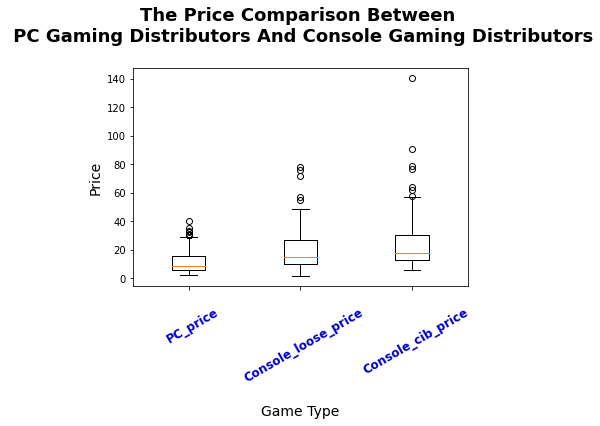

In [11]:
def plot_price(price_merged):
    '''
    Input: The data from the merged table about 2 figures of the number of prices 
    between console and PC
    Output: The boxplot comparing the number of prices for 2 types of game 
    (or games' packagings) in 2 platforms.
    
    This function is designed to visualize the price of games on both PC and console. 
    For console games (PS4), the chart also compares 2 types of game packagings 
    (loose vs complete-in-box/cib)
    '''
    PC_price = []
    for i in list(price_merged['PC_Price']):
        PC_price.append(float(i))
    PC_price1 = [ i for i in PC_price if i > 0]



    Console_loose_price = []
    for i in list(price_merged['Console_loose_price']):
        i = str(i)
        if i == 'nan':
            continue
        if i[0] == '$':
            i = i[1:]
        Console_loose_price.append(float(i))   
    Console_loose_price1 = [ i for i in Console_loose_price if i > 0]



    Console_cib_price = []
    for i in list(price_merged['Console_cib_price']):
        i = str(i)
        if i == 'nan':
            continue
        if i[0] == '$':
            i = i[1:]
        Console_cib_price.append(float(i))
    Console_cib_price1 = [ i for i in Console_cib_price if i > 0]

    data_epic_merge = [PC_price1, Console_loose_price1, Console_cib_price1]
    fig0, ax0 = plt.subplots()
    ax0.set_title("The Price Comparison Between \n PC Gaming Distributors And Console Gaming Distributors\n", fontweight='bold', fontsize=18)
    ax0.boxplot(data_epic_merge)
    plt.xticks([1, 2, 3], ["\nPC_price", "\nConsole_loose_price", "\nConsole_cib_price"], rotation=30, fontweight='bold', fontsize= 12, color = "#0000CD")
    plt.xlabel("\nGame Type", fontweight='normal', fontsize=14)
    plt.ylabel("\nPrice", fontweight='normal', fontsize=14)
    plt.show()

plot_price(merged_price(epic_game("epic-games.json"),price_guide("./price-guide.csv")))

Overall: As can be seen from the chart, the prices for the PC games are much lower than the console counterparts. The average of PC games' price are USD **10** whereas the Console loose price and Console CIB price are about USD 16 to USD **17**. Also from the chart, we can see that the maximum value (the outlier) for 1 console game (CIB - Complete-In-Box price) can go beyond USD **140**. This figure for the PC game is only USD **40** which is **2/7** of the one for console game.  

## Question 3: What is the review/rating between the PC games compared to the Console games using GOG_games.json (PC) and Game_list_rating.csv (Console)?

### Read the Game_list_rating.csv file, GOG_games.json file and merge them together

In [12]:
def merged_rating(filename):
    '''
    Input: The json file
    Output: The merged tabular data for with selected information - the rating
    gog_df: The given variable used to attach the dataframe of ratings
    gog_ps4_merged: The given variable used to contain merged dataframe.

    
    This function is made for transforming the data from json form into a uniform dataframe 
    and merge it with the previous tabular data of PS4 in terms of players' ratings.
    '''
    filepath = filename

    ps4_game_list_df = pd.read_csv(filepath)
    ps4_game_list_df=ps4_game_list_df[['Game_Name','game_rating']]


    f = open("./GOG_games.json", "r")
    gog = json.load(f)
    f.close()
    gog_attr=['Name','Review']
    gog_list=[]
    for i in gog:
        gog_review_name_list=[]
        for name in i:
            if name=="name":
                gog_review_name_list.append(i[name])
            elif name=="player_rating":
                gog_review_name_list.append(i[name])
        gog_list.append(gog_review_name_list)

    gog_df=pd.DataFrame(gog_list,columns=gog_attr)


    gog_ps4_merged=pd.merge(ps4_game_list_df,gog_df,left_on="Game_Name",right_on="Name",how="inner")
    gog_ps4_merged=gog_ps4_merged[['Name','game_rating','Review']]
    gog_ps4_merged.rename(columns={"game_rating": "PS4_review", "Review": "GOG_review"},inplace=True)
    return gog_ps4_merged

merged_rating("./Game_list_rating.csv")

,Name,PS4_review,GOG_review
0,The Witcher 3: Wild Hunt,4.68,4.9
1,The Walking Dead: Season 1,4.27,4.5
2,Terraria,3.98,4.8
3,Amnesia: The Dark Descent,3.62,4.6
4,Hotline Miami,4.32,4.6
...,...,...,...
195,Space Pirates and Zombies,3.10,4.3
196,Capsized,2.82,3.8
197,Doom 3: BFG Edition,3.91,3.5
198,Edna & Harvey: Harvey's New Eyes,3.00,4.4


### Ploting the Histogram to visualize Rating/Review score

#### Separate data from the main data frame

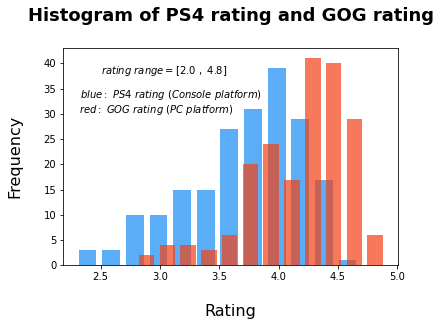

In [13]:
def visualize_rating(merge_gog_ps4):
    '''
    Input: The data from the merged table about 2 figures of the number of prices 
    between console and PC
    Output: The histogram comparing the ratings from players about games on 2 platforms.
    
    This function is designed to visualize the players' ratings on both PC and console
    in the form of a histogram. 
    '''
    PS4_review = []
    for i in list(merge_gog_ps4['PS4_review']):
        PS4_review.append(float(i))

    GOG_review = []
    for i in list(merge_gog_ps4['GOG_review']):
        GOG_review.append(float(i))
    GOG_review1 = [i for i in GOG_review if i>0]

    n, bins, patches = plt.hist(x=PS4_review, bins='auto', color='#158BF4',
                                alpha=0.7, rwidth=0.75)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('\nRating', fontweight='normal', fontsize=16)
    plt.ylabel('Frequency\n', fontweight='normal', fontsize=16)


    n, bins, patches = plt.hist(x=GOG_review1, bins='auto', color='#F44115',
                                alpha=0.7, rwidth=0.75)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('\nRating', fontweight='normal', fontsize=16)
    plt.ylabel('Frequency\n', fontweight='normal', fontsize=16)
    plt.title('Histogram of PS4 rating and GOG rating\n',fontweight='bold', fontsize=18)
    plt.text(2.5, 38, r'$rating\ range =[2.0 \ ,\  4.8]$')
    plt.text(2.3, 33.2, r'$\ blue:\ PS4\ rating\ (Console\ platform)$')
    plt.text(2.32, 30.2, r'$red:\ GOG\ rating\ (PC\ platform)$')

visualize_rating(merged_rating("./Game_list_rating.csv"))

As can seen from the chart, both of histograms are left-skewed so it brings the positive thoughts to the gaming market that both of the platforms are bringing the better experience to the players. The overall rating for the PC is higher than the one from Console. The maximum rating for the Console is **4.0** while this figure for the PC is **4.3**. 

## Question 4: Is PC or Console game digital distribution service provides more popular games' genre?

### According to the MasterClass, the top 5 common video game genres among the internet users worldwide are Action, Adventure, Action-Adventure, Role-playing (RPG), Strategy.


<ipython-input-14-7e630a1905eb>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels,rotation=0, fontweight='bold', fontsize= 12, color = "#0000CD")


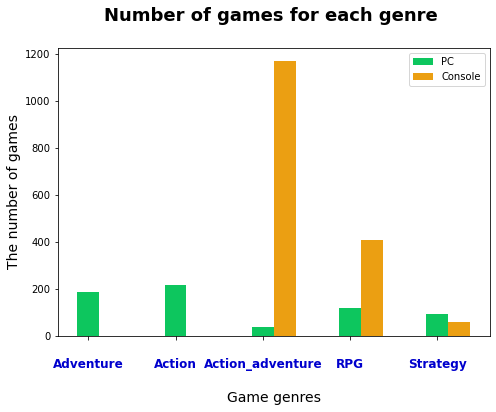

In [14]:
def visualize_genre(epic,df_price):
    '''
    Input: The data from 2 converted datasets: Epic-games and price-guide.
    Output: The barchart for the top 5 common video game genre.
    
    This function is designed to filter out and visualize how popular games are made based on 
    5 common genres. The barchart has the width of 0.25 pixel unit for each bar. 
    '''
    # Get the number of games for each genre in Epic-games data and price-guide data
    Epic_count_adventure=0
    Epic_count_action=0
    Epic_count_action_adventure=0
    Epic_count_RPG=0
    Epic_count_strategy=0
    for i in epic:
        for name in i:
            if name=="tags":
                for genre in i[name]:
                    if genre=="Adventure":
                        Epic_count_adventure+=1
                    elif genre=="Action":
                        Epic_count_action+=1
                    elif genre=="Action-Adventure":
                        Epic_count_action_adventure+=1
                    elif genre=="RPG":
                        Epic_count_RPG+=1
                    elif genre=="Strategy":
                        Epic_count_strategy+=1

    PS4_count_adventure=0
    PS4_count_action=0
    PS4_count_action_adventure=0
    PS4_count_RPG=0
    PS4_count_strategy=0
    for genre in df_price['genre']:
        if genre=="Adventure":
            PS4_count_adventure+=1
        elif genre=="Action":
            PS4_count_action+=1
        elif genre=="Action & Adventure":
            PS4_count_action_adventure+=1
        elif genre=="RPG":
            PS4_count_RPG+=1
        elif genre=="Strategy":
            PS4_count_strategy+=1

    # Using barplot to visualize the number of games for each genre in both devices.
    x_labels= ['','\nAdventure', '\nAction', '\nAction_adventure', '\nRPG', '\nStrategy']
    data = [[Epic_count_adventure, Epic_count_action, Epic_count_action_adventure, Epic_count_RPG, Epic_count_strategy],
    [PS4_count_adventure, PS4_count_action, PS4_count_action_adventure, PS4_count_RPG, PS4_count_strategy]]
    X = np.arange(5)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = '#0DC65E', width = 0.25)
    ax.bar(X + 0.25, data[1], color = '#EB9F12', width = 0.25)
    ax.set_xlabel('\nGame genres', fontweight='normal', fontsize=14)
    ax.set_ylabel('The number of games', fontweight='normal', fontsize=14)
    ax.set_title('Number of games for each genre \n', fontweight='bold', fontsize=18 )
    ax.set_xticklabels(x_labels,rotation=0, fontweight='bold', fontsize= 12, color = "#0000CD")
    ax.legend(labels=['PC', 'Console'])

visualize_genre(epic_game("epic-games.json"),price_guide("./price-guide.csv"))

In this barplot, we can see that for the PC platform provides more diverse game genres, especially **Adventure, Action, and Strategy** whereas PS4 has the advantage in developing the game in *Action_adventure and RPG genres.* However, the first and second common video game genres that are listed by the Masterclass are **Action** and **Adventure**. Thus, PC provides more popular games' genres, but you are looking the action_adventure combined experience, you can look for the games on console platform. 

### 6. Conclusion

From this research, we can see that PC games has an outstanding advantage in all prices, the diversity of game genres, and the reviews from the players. As the result, it has no surprise that in the first question' analysis, we can see that the number of the players for PC platform dominates dramatically the number of players for Console platform. In conclusion, the PC gaming platform are taking the leading role in the gaming market.

### 7. Bibliography

- Steam database: SteamDB — a Database of Everything on Steam. https://steamdb.info/. 
- Epic-Game database: Ragavendran, Karthick. “Epic-Games-Data.” Kaggle, 18 Sept. 2021, https://www.kaggle.com/karthickragavendran/epicgamesdata. 
- GOG-Game store database: Beastovest. “Gog Games with Reviews.” Kaggle, 10 Nov. 2018, https://www.kaggle.com/beastovest/gog-games-with-reviews. 
- ps4_players database: “Timetracker.” PS, https://ps-timetracker.com/statistic/last-30-days/PS4. 
- price-guide database: “PlayStation 4 Prices &amp; PS4 Game List.” PriceCharting, https://www.pricecharting.com/console/playstation-4. 
- Game_list_rating database: Raad, Rayan. “Game Rating.” Kaggle, 19 Apr. 2020, https://www.kaggle.com/rayanraad/game-rating. 
- Common video game genre: MasterClass. “Guide to Video Game Genres: 10 Popular Video Game Types - 2021.” MasterClass, MasterClass, 8 Nov. 2020, https://www.masterclass.com/articles/guide-to-video-game-genres#what-is-a-video-game-genre. 